<a href="https://colab.research.google.com/github/AzadMahmud/AI-Lab/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=20, batch_size=64, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8534 - loss: 0.5106 - val_accuracy: 0.9660 - val_loss: 0.1129
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9644 - loss: 0.1163 - val_accuracy: 0.9758 - val_loss: 0.0876
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9772 - loss: 0.0737 - val_accuracy: 0.9757 - val_loss: 0.0830
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9735 - val_loss: 0.0891
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9858 - loss: 0.0438 - val_accuracy: 0.9763 - val_loss: 0.0775
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9797 - val_loss: 0.0692
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9790 - val_loss: 0.0765
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0

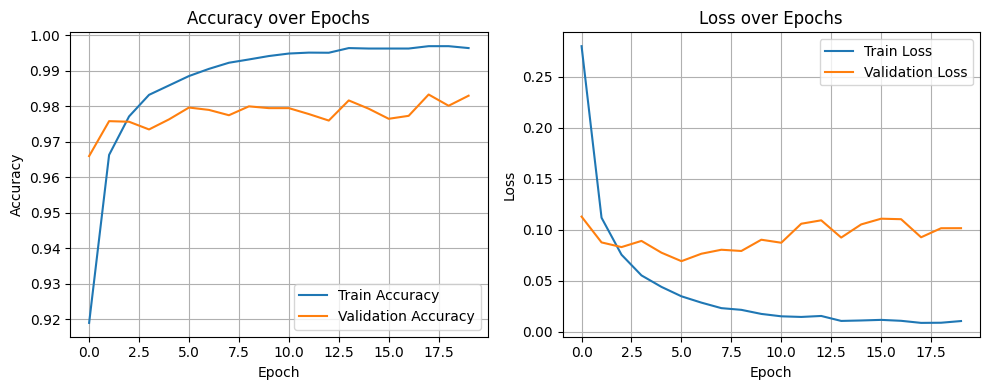

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


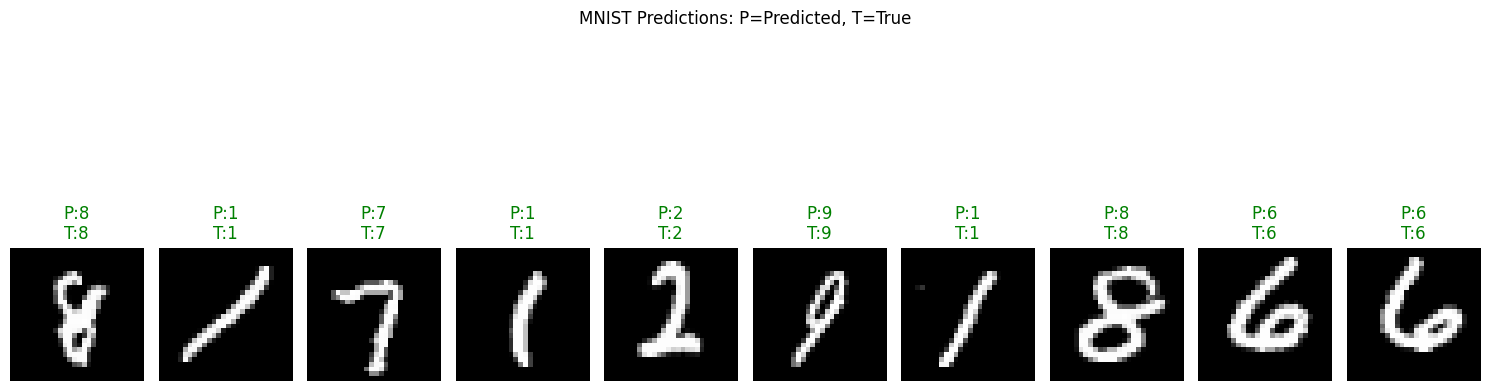

In [15]:
# 8. Plot training and validation accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 9. Plot training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_loss_curves.png')
plt.show()

import matplotlib.pyplot as plt
import numpy as np

num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

pred_labels = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(15,6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"P:{pred_labels[i]}\nT:{sample_labels[i]}", color='green' if pred_labels[i]==sample_labels[i] else 'red')

plt.suptitle("MNIST Predictions: P=Predicted, T=True")
plt.tight_layout()
plt.show()

